# SERA Optimization Climate Results v2

v2 involes using the improved relevance function (0.3 IW and x3=3) aswell as old relevance function + XGB Custom.

In [1]:
import pandas as pd
import os
import sys

import numpy as np

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    get_info_experiment,
    summarize_best_results_by_index,
    plot_average_best_results,
    plot_best_results_per_season,
    PredictionExperiment
)

c:\Users\marti\Desktop\data\hw_extra


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
def train_single_label_exp(exp_id, season, label_interest, model_exp, name_model, region):
    labels_to_remove = ["HWN", "HWF", "HWD", "HWA", "HWM"]
    labels_to_remove.remove(label_interest)
    display(get_info_experiment(exp_id, metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path))
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    data[season].drop(columns=labels_to_remove, inplace=True)
    experiment_1 = PredictionExperiment(data, [label_interest], [model_exp], [name_model], 5, id)
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    display(experiment_1.results)
    return experiment_1

def display_full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', '{:,.2f}'.format):  # more options can be specified also
        display(df)

In [4]:
my_indices_path = "data/my_indices/metadata.csv"
extra_indices_path = "data/extra_indices/metadata.csv"

## Chile

In [5]:
region = "chile"
metadata_exp_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_exp_path)
metadata.rename(columns={"id":"id_data"}, inplace=True)
metadata

,id_data,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
259,f1c4c128,predictor_f1c4c128_8.parquet,8,c2b06127-379b6a95-73d2026c-09447a4a-fd444d4e-d...
260,f1c4c128,predictor_f1c4c128_9.parquet,9,c2b06127-379b6a95-73d2026c-09447a4a-fd444d4e-d...
261,f1c4c128,predictor_f1c4c128_10.parquet,10,c2b06127-379b6a95-73d2026c-09447a4a-fd444d4e-d...
262,f1c4c128,predictor_f1c4c128_11.parquet,11,c2b06127-379b6a95-73d2026c-09447a4a-fd444d4e-d...


In [6]:
results = pd.read_csv(f"data/sera_results_v2/{region}_results/results.csv")
results

,model,season,Bounds,I_w,metric,stage,HWN,HWF,HWD,HWM,HWA,Average,id_data
0,RNN16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.198277,0.420280,0.279331,-0.261041,0.645928,0.256555,978f49d7
1,LSTM16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.296182,0.144856,0.433733,-0.017282,0.378125,0.247123,978f49d7
2,CNNRNN16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.651808,0.092344,0.203095,0.848138,-0.461831,0.266711,978f49d7
3,MLP16,1,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,0.019859,-0.237937,0.169134,0.461210,0.526980,0.187849,978f49d7
4,RNN16,2,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,r2,prediction,-0.895985,-0.677213,-2.911738,-0.495697,-0.132901,-1.022707,978f49d7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38203,CXGB15,12,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,sera,TSCV,3.002422,2.795256,2.779977,0.914687,1.230062,2.144481,f1c4c128
38204,RNN16,12,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,sera,TSCV,6.856695,6.856695,6.856695,6.856695,6.856695,6.856695,f1c4c128
38205,LSTM16,12,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,sera,TSCV,7.365660,7.365660,7.365660,7.365660,7.365660,7.365660,f1c4c128
38206,CNNRNN16,12,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,sera,TSCV,7.828117,7.828117,7.828117,7.828117,7.828117,7.828117,f1c4c128


In [7]:
# Example usage
summary_sera = summarize_best_results_by_index(results, metadata, metric="sera", top_n=3, stage="prediction", sera=True)
summary_cv_sera = summarize_best_results_by_index(results, metadata, metric="sera", top_n=3, stage="CV", sera=True)
summary_tscv_sera = summarize_best_results_by_index(results, metadata, metric="sera", top_n=3, stage="TSCV", sera=True)

# Example usage
summary_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=3, stage="prediction", sera=True)
summary_cv_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=3, stage="CV", sera=True)
summary_tscv_mae = summarize_best_results_by_index(results, metadata, metric="mae", top_n=3, stage="TSCV", sera=True)

In [8]:
summary_cv_mae

,model,season,id_data,Bounds,I_w,index,best_value,filename,indices
0,CNNRNN16,12,458d357c,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,Average,0.427200,predictor_458d357c_12.parquet,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
1,MLP16,12,9f8163e4,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,Average,0.429003,predictor_9f8163e4_12.parquet,fde0e327-340e2882-8c5bce37-880b8b63-c6b80290-3...
2,MLP16,12,311dd366,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,Average,0.442122,predictor_311dd366_12.parquet,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
3,RNN16,5,3832cbd6,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWA,0.462556,predictor_3832cbd6_5.parquet,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
4,CNNRNN16,12,30ab9bad,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWA,0.470384,predictor_30ab9bad_12.parquet,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
5,MLP16,12,311dd366,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWA,0.472599,predictor_311dd366_12.parquet,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
6,LSTM16,12,9bd58418,-1.1692892810242344|-0.30647585455315646|4.561...,0.1,HWD,0.405855,predictor_9bd58418_12.parquet,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
7,LSTM16,12,3df87a13,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWD,0.412152,predictor_3df87a13_12.parquet,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
8,MLP16,12,311dd366,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWD,0.414081,predictor_311dd366_12.parquet,fde0e327-340e2882-8c5bce37-880b8b63-aa75d48e-8...
9,CNNRNN16,12,458d357c,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.3,HWF,0.370168,predictor_458d357c_12.parquet,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


In [9]:
cv_sera_seasons = {}
sera_seasons = {}
tscv_sera_seasons = {}

cv_mae_seasons = {}
mae_seasons = {}
tscv_mae_seasons = {}

for i in range(13):
    results_season = results[results["season"]==i]
    cv_sera_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="sera",stage="CV" , top_n=1, sera=True)
    tscv_sera_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="sera",stage="TSCV" , top_n=1, sera=True)
    sera_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="sera",stage="prediction", top_n=1, sera=True)
    cv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="CV" , top_n=1, sera=True)
    tscv_mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="TSCV" , top_n=1, sera=True)
    mae_seasons[i] = summarize_best_results_by_index(results_season, metadata, metric="mae",stage="prediction", top_n=1, sera=True)

cv_sera_seasons = pd.concat(list(cv_sera_seasons.values()))
tscv_sera_seasons = pd.concat(list(tscv_sera_seasons.values()))
sera_seasons = pd.concat(list(sera_seasons.values()))
cv_mae_seasons = pd.concat(list(cv_mae_seasons.values()))
tscv_mae_seasons = pd.concat(list(tscv_mae_seasons.values()))
mae_seasons = pd.concat(list(mae_seasons.values()))



In [10]:
display_full(mae_seasons)

,best_value,model,Bounds,I_w,index,training_value,id_data,filename,season,indices
0,0.49,RNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,Average,0.90,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
1,0.24,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWA,0.72,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,0.47,MLP16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWD,0.37,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
3,0.33,LSTM16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWF,0.40,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
4,0.18,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWM,0.39,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
5,0.31,MLP16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWN,0.57,3832cbd6,predictor_3832cbd6_1.parquet,1,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
0,0.60,RNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,Average,0.52,d7101242,predictor_d7101242_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
1,0.69,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWA,0.62,3df87a13,predictor_3df87a13_2.parquet,2,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
2,0.29,MLP16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWD,0.51,ecf2577f,predictor_ecf2577f_2.parquet,2,1f3bbd82-aac61eb2-bf935817-80ce3764-d6188e35-7...
3,0.52,CNNRNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWF,0.63,458d357c,predictor_458d357c_2.parquet,2,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


In [11]:
display_full(cv_mae_seasons)

,model,Bounds,I_w,index,best_value,id_data,filename,season,indices
0,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,Average,0.62,458d357c,predictor_458d357c_1.parquet,1,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
1,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWA,0.63,13a24caf,predictor_13a24caf_1.parquet,1,fde0e327-340e2882-a5df415f-c6184040-c1c59e4d-8...
2,CNNRNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWD,0.61,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWF,0.55,458d357c,predictor_458d357c_1.parquet,1,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
4,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWM,0.60,458d357c,predictor_458d357c_1.parquet,1,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
5,CNNRNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWN,0.58,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
0,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,Average,0.58,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
1,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWA,0.51,3df87a13,predictor_3df87a13_2.parquet,2,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
2,CNNRNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWD,0.60,3832cbd6,predictor_3832cbd6_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
3,LSTM16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWF,0.54,30ab9bad,predictor_30ab9bad_2.parquet,2,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...


In [12]:
display_full(tscv_mae_seasons)

,model,Bounds,I_w,index,best_value,id_data,filename,season,indices
0,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,Average,0.68,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWA,0.59,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWD,0.70,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWF,0.75,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWM,0.71,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
5,RNN16,-1.1692892810242344|-0.30647585455315646|3.0|6...,0.30,HWN,0.65,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
0,LSTM16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,Average,0.61,30ab9bad,predictor_30ab9bad_2.parquet,2,fde0e327-340e2882-880b8b63-aa75d48e-88249a81-f...
1,LSTM16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWA,0.46,458d357c,predictor_458d357c_2.parquet,2,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
2,LSTM16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWD,0.55,f1c4c128,predictor_f1c4c128_2.parquet,2,c2b06127-379b6a95-73d2026c-09447a4a-fd444d4e-d...
3,CNNRNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWF,0.60,d7101242,predictor_d7101242_2.parquet,2,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...


In [13]:
display_full(sera_seasons)

,best_value,model,Bounds,I_w,index,training_value,id_data,filename,season,indices
0,1.15,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,Average,3.50,3832cbd6,predictor_3832cbd6_1.parquet,1,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
1,0.24,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWA,3.59,9f8163e4,predictor_9f8163e4_1.parquet,1,fde0e327-340e2882-8c5bce37-880b8b63-c6b80290-3...
2,1.80,RNN16,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWD,58.58,8359c65d,predictor_8359c65d_1.parquet,1,422ed1de-59f835e4-c1c59e4d-03244181-1223f1f4-7...
3,1.63,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWF,3.51,3832cbd6,predictor_3832cbd6_1.parquet,1,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
4,0.16,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWM,3.65,1b939ac5,predictor_1b939ac5_1.parquet,1,fde0e327-340e2882-b91ccd4e-c6184040-c1c59e4d-8...
5,0.32,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWN,3.62,3832cbd6,predictor_3832cbd6_1.parquet,1,fde0e327-340e2882-13e2f761-aa75d48e-2748fd3a-f...
0,3.10,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,Average,2.31,ecf2577f,predictor_ecf2577f_2.parquet,2,1f3bbd82-aac61eb2-bf935817-80ce3764-d6188e35-7...
1,4.04,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWA,1.71,ecf2577f,predictor_ecf2577f_2.parquet,2,1f3bbd82-aac61eb2-bf935817-80ce3764-d6188e35-7...
2,0.58,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWD,3.27,ecf2577f,predictor_ecf2577f_2.parquet,2,1f3bbd82-aac61eb2-bf935817-80ce3764-d6188e35-7...
3,2.55,CXGB15,-1.1692892810242344|-0.30647585455315646|4.561...,0.10,HWF,2.54,ecf2577f,predictor_ecf2577f_2.parquet,2,1f3bbd82-aac61eb2-bf935817-80ce3764-d6188e35-7...


In [14]:
ids_metadata = metadata["id_data"].unique()
ids_best_results = np.concatenate((
    cv_sera_seasons["id_data"].unique(),
    cv_mae_seasons["id_data"].unique(),
    tscv_mae_seasons["id_data"].unique(),
    tscv_sera_seasons["id_data"].unique()
    )
)
ids_best_results = np.unique(ids_best_results)
print("Total experiments:", ids_metadata)
print("Best id experiments:", ids_best_results)
print("'Bad' Experiments:", [id for id in ids_metadata if id not in ids_best_results] )

Total experiments: ['978f49d7' '69ae08a8' '1b939ac5' '50a3f070' '4d17ba1a' '3adff093'
 'b33fc639' '511854f2' '9bd58418' 'd7101242' '3832cbd6' '3df87a13'
 '30ab9bad' '311dd366' '8c95fd00' '9f8163e4' '4effa258' '13a24caf'
 '8359c65d' 'ecf2577f' '458d357c' 'f1c4c128']
Best id experiments: ['13a24caf' '1b939ac5' '30ab9bad' '311dd366' '3832cbd6' '3adff093'
 '3df87a13' '458d357c' '4d17ba1a' '4effa258' '50a3f070' '511854f2'
 '69ae08a8' '8359c65d' '8c95fd00' '978f49d7' '9bd58418' '9f8163e4'
 'b33fc639' 'd7101242' 'ecf2577f' 'f1c4c128']
'Bad' Experiments: []


In [15]:
ids_best_results = pd.concat((
    cv_sera_seasons["id_data"],
    cv_mae_seasons["id_data"],
    tscv_mae_seasons["id_data"],
    tscv_sera_seasons["id_data"]
    )
)
ids_best_results.value_counts()

id_data
3832cbd6    49
9bd58418    25
8c95fd00    25
ecf2577f    24
458d357c    21
d7101242    21
f1c4c128    18
311dd366    17
30ab9bad    17
3adff093    12
978f49d7    11
3df87a13    10
1b939ac5     9
9f8163e4     7
511854f2     5
b33fc639     4
69ae08a8     4
8359c65d     3
13a24caf     2
50a3f070     2
4effa258     1
4d17ba1a     1
Name: count, dtype: int64

## Check most frequent experiments

In [16]:
import xarray as xr
import pandas as pd
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.calc import advection
from metpy.units import units


In [17]:
data_single = xr.load_dataset("data/local_data/7means_east_pacific.nc")


Lets check on the most frequent experiment among all month results

In [6]:
get_info_experiment("3832cbd6" , metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
13e2f761,index_13e2f761.parquet,max,1,MSL,260|284|-55|-25,NoRef,1972-2022
aa75d48e,index_aa75d48e.parquet,anom,1,U,287|289|-42|-33,1980-2010,1972-2022
2748fd3a,index_2748fd3a.parquet,anom,1,MSL,290|295|-42|-33,1980-2010,1972-2022
f6e4a28a,index_f6e4a28a.parquet,anom,1,MSL,286|288.5|-33|-28,1980-2010,1972-2022
7728bf70,index_7728bf70.parquet,anom,1,MSL,280|286|-38|-30,1980-2010,1972-2022
a66b8219,index_a66b8219.parquet,anom,1,MSL,291|295|-38|-30,1980-2010,1972-2022


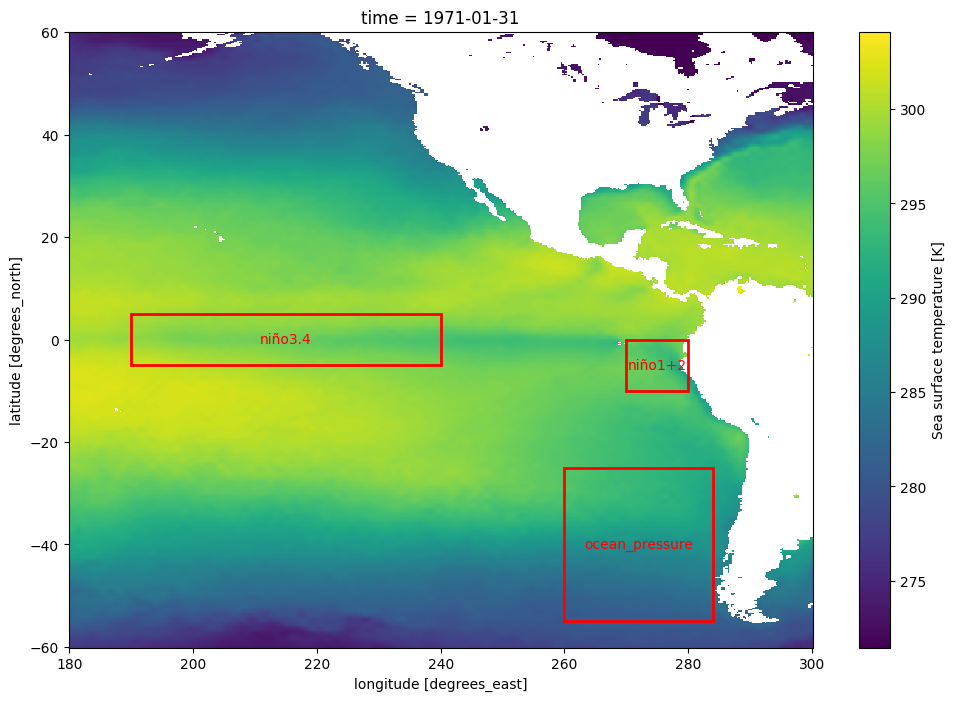

In [19]:
boxes_pacific = {
    "niño3.4": [190, 240, -5, 5],  # [lon_min, lon_max, lat_min, lat_max]
    "niño1+2": [270, 280, -10, 0],
    "ocean_pressure": [260, 284, -55, -25], #study max over time and define region
    # "ocean_pressure": [260, 284, -44, -17], #last defined ocean max pressure
    
    #"advección": [280, 285, -37, -30]
}

fig, ax = plt.subplots(figsize=(12, 8))

data_single.sst.isel(time=0).plot(ax=ax)

for box_id, coords in boxes_pacific.items():
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
            ha='center', va='center', color='red')

plt.show()

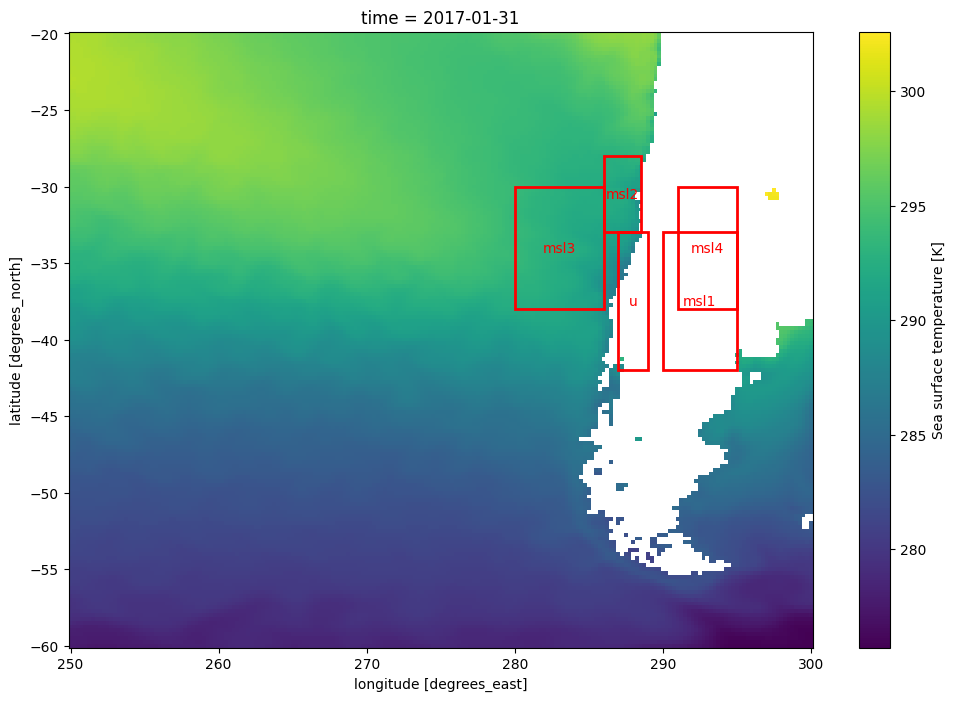

In [20]:
boxes_chile = {
    "u" : [287,289,-42,-33],
    "msl1": [290,295,-42,-33],
    "msl2": [286,288.5,-33,-28],
    "msl3": [280,286,-38,-30],
    "msl4": [291,295,-38,-30]
}

fig, ax = plt.subplots(figsize=(12, 8))

data_single.sel(longitude=slice(250,300), latitude=slice(-60,-20), time="2017-01").sst.plot(ax=ax)

for box_id, coords in boxes_chile.items():
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
            ha='center', va='center', color='red')

plt.show()

In [21]:
get_info_experiment("ecf2577f" , metadata_exp_path=metadata_exp_path, metadata_index_path=my_indices_path, extra_indices_path=extra_indices_path)

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
1f3bbd82,index_1f3bbd82.parquet,normdiff,1,MSL,vaguada|config,NoRef,1972-2022
aac61eb2,index_aac61eb2.parquet,normalized,1,ADV,268|283|-32|-20,1972-2024,1972-2022
bf935817,index_bf935817.parquet,normalized,1,ADV,282|286|-42|-33,1972-2024,1972-2022
80ce3764,index_80ce3764.parquet,bloqueo,1,U|MSL,bloqueo|norte|boxes,1980-2010,1972-2022
d6188e35,index_d6188e35.parquet,bloqueo,1,U|MSL,bloqueo|sur|boxes,1980-2010,1972-2022
74b64e71,index_74b64e71.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
e08793a9,index_e08793a9.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
15f248b7,index_15f248b7.parquet,anom,1,T,286|288|-42|-33,1980-2010,1972-2022
f00694af,index_f00694af.parquet,max,1,MSL,260|284|-44|-17,1980-2010,1972-2022


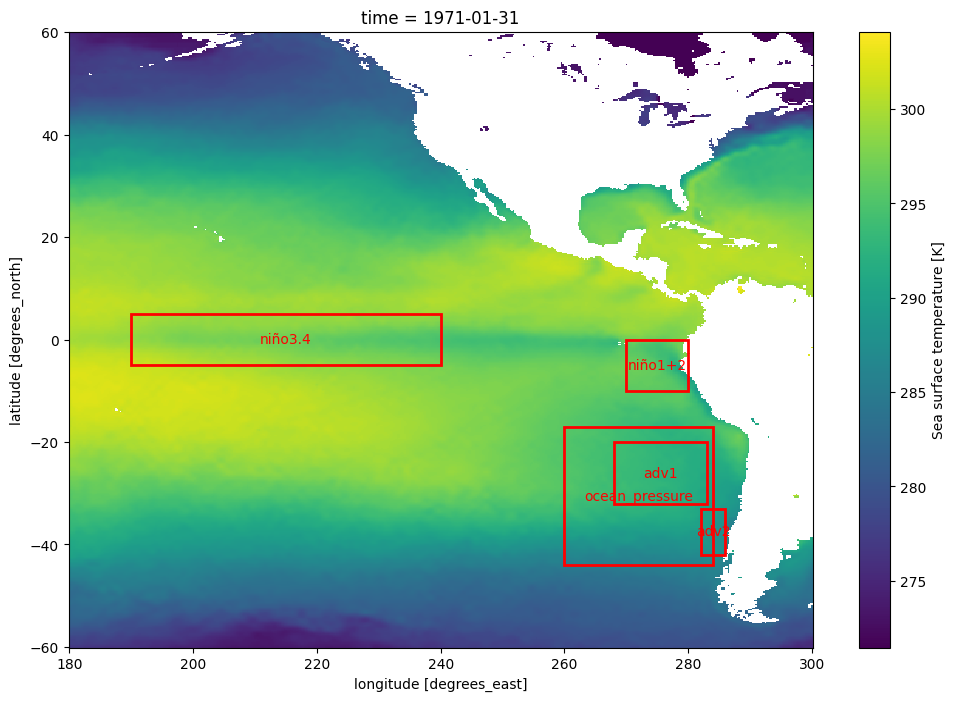

In [22]:
boxes_pacific = {
    "niño3.4": [190, 240, -5, 5],  # [lon_min, lon_max, lat_min, lat_max]
    "niño1+2": [270, 280, -10, 0],
    # "ocean_pressure": [260, 284, -55, -25], #study max over time and define region
    "ocean_pressure": [260, 284, -44, -17], #last defined ocean max pressure
    "adv1": [268,283,-32,-20],
    "adv2": [282,286,-42,-33]
    
    #"advección": [280, 285, -37, -30]
}

fig, ax = plt.subplots(figsize=(12, 8))

data_single.sst.isel(time=0).plot(ax=ax)

for box_id, coords in boxes_pacific.items():
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
            ha='center', va='center', color='red')

plt.show()

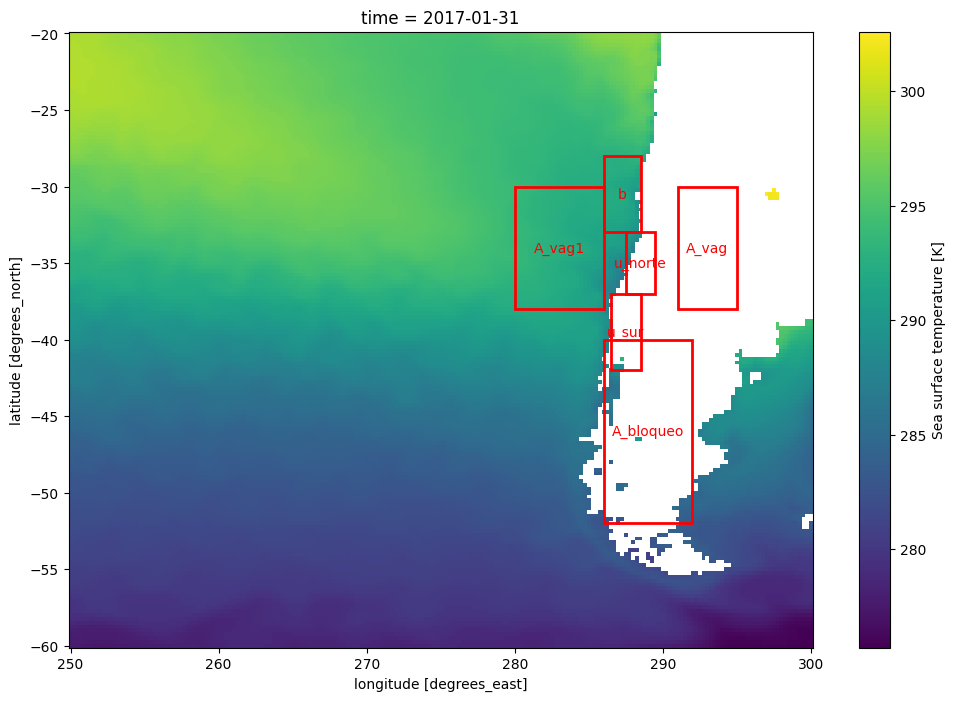

In [23]:
boxes_chile = {
    "b": [286, 288.5, -33, -28],
    "A_vag1": [280, 286, -38,-30], #test bigger A boxes
    "A_vag": [291, 295, -38, -30],
    "u_norte": [287.5, 289.5, -37, -33],
    "u_sur": [286.5, 288.5, -42, -37],
    "A_bloqueo": [286, 292, -52, -40]
}

fig, ax = plt.subplots(figsize=(12, 8))

data_single.sel(longitude=slice(250,300), latitude=slice(-60,-20), time="2017-01").sst.plot(ax=ax)

for box_id, coords in boxes_chile.items():
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{box_id}", 
            ha='center', va='center', color='red')

plt.show()

## Check best indices

In [24]:
freq_indices = pd.DataFrame()
ids_freq = ids_best_results.value_counts()
for index, value in zip(ids_freq.index, ids_freq):
    for k in range(value):
        freq_indices = pd.concat((freq_indices,
                                  get_info_experiment(index, 
                                                      metadata_exp_path=metadata_exp_path, 
                                                      metadata_index_path=my_indices_path, 
                                                      extra_indices_path=extra_indices_path)))

In [25]:
freq_df = pd.DataFrame(freq_indices[["method", "rolling", "variables", "boxes", "reference_period"]].value_counts())
freq_df

count
method     rolling variables boxes                     reference_period       
anom       1       SST       190|240|-5|5              1980-2010           268
                             270|280|-10|0             1980-2010           268
DifAnom    1       SLP       X|X|-65|-40               1981-2010           188
EOF        1       SSTAnom   110|260|20|70             unknown             188
Grad       1       SSTAnom   50|70|-10|10;90|110|-10|0 1991-2020           188
Anom       3       SST       190|240|-5|5              30yearsliding       183
anom       1       MSL       280|286|-38|-30           1980-2010           182
                             291|295|-38|-30           1980-2010           175
                             286|288.5|-33|-28         1980-2010           175
                   U         287|289|-42|-33           1980-2010           147
                   ADV       268|283|-32|-20           1980-2010           108
                   MSL       286|292|-52|-40           1980-2010           101
                   ADV       282|286|-42|-33           1980-2010           101
                   T         286|288|-42|-33           1980-2010            99
max        1       MSL       260|284|-44|-17           NoRef                80
anom       1       MSL       290|295|-42|-33           1980-2010            74
max        1       MSL       260|284|-55|-25           NoRef                74
anom       1       U         289|290.5|-34|-30         1980-2010            61
                   MSL       282|288.5|-43|-38         1980-2010            61
                   U         282|289|-34|-30           1980-2010            54
                             282|288.5|-53|-43         1980-2010            54
                             282|288.5|-43|-38         1980-2010            54
                   MSL       282|290.5|-34|-30         1980-2010            54
                             282|289|-38|-34           1980-2010            54
                             282|288.5|-53|-43         1980-2010            54
                   U         282|289|-38|-34           1980-2010            54
max        1       MSL       245|284|-45|-15           NoRef                51
                             282|292|-38|-34           NoRef                48
                             260|284|-44|-17           1980-2010            47
ADVU       1       U|T       282|288|-42|-26           NoRef                46
max        1       MSL       282|292|-43|-38           NoRef                41
                             282|292|-34|-30           NoRef                41
anom       1       U         287.5|289.5|-37|-33       1980-2010            28
                             286.5|288.5|-42|-37       1980-2010            28
normalized 1       ADV       282|286|-42|-33           1972-2024            26
                             268|283|-32|-20           1972-2024            26
normdiff   1       MSL       vaguada|config            NoRef                26
bloqueo    1       U|MSL     bloqueo|sur|boxes         1980-2010            26
                             bloqueo|norte|boxes       1980-2010            26
anom       1       SP        282|290|-43|-38           1980-2010            13
                             282|290|-38|-34           1980-2010            13
                             282|290|-34|-30           1980-2010            13
max        1       SP        220|280|-35|-10           NoRef                13
anom       1       U10       282|290|-37|-30           1980-2010            13
                   SP        282|290|-56|-43           1980-2010            13
                   ADV       282|288|-43|-26           1980-2010             9
                   MSL       291|295|-38|30            1980-2010             7
max        1       MSL       245|284|-45|-15           1980-2010             3
                             282|292|-34|-30           1980-2010             1
                             282|292|-38|-34

In [26]:
freq_indices_total = pd.DataFrame()
ids_freq = results["id_data"].value_counts()
for index, value in zip(ids_freq.index, ids_freq):
    for k in range(value):
        freq_indices_total = pd.concat((freq_indices_total,
                                  get_info_experiment(index, 
                                                      metadata_exp_path=metadata_exp_path, 
                                                      metadata_index_path=my_indices_path, 
                                                      extra_indices_path=extra_indices_path)))

In [27]:
freq_total_df = pd.DataFrame(freq_indices_total[["method", "rolling", "variables", "boxes", "reference_period"]].value_counts())
freq_total_df

count
method     rolling variables boxes                     reference_period       
anom       1       SST       270|280|-10|0             1980-2010         33792
                             190|240|-5|5              1980-2010         33792
DifAnom    1       SLP       X|X|-65|-40               1981-2010         30336
EOF        1       SSTAnom   110|260|20|70             unknown           30336
Grad       1       SSTAnom   50|70|-10|10;90|110|-10|0 1991-2020         30336
Anom       3       SST       190|240|-5|5              30yearsliding     28608
anom       1       MSL       282|288.5|-43|-38         1980-2010         18240
                   U         289|290.5|-34|-30         1980-2010         18240
                             282|288.5|-53|-43         1980-2010         16512
                             282|289|-34|-30           1980-2010         16512
                             282|289|-38|-34           1980-2010         16512
                             282|288.5|-43|-38         1980-2010         16512
                   MSL       282|289|-38|-34           1980-2010         16512
                             282|288.5|-53|-43         1980-2010         16512
                             282|290.5|-34|-30         1980-2010         16512
                             280|286|-38|-30           1980-2010         15552
                             286|288.5|-33|-28         1980-2010         13824
                             291|295|-38|-30           1980-2010         13824
max        1       MSL       245|284|-45|-15           NoRef             13056
anom       1       ADV       268|283|-32|-20           1980-2010         12096
                   MSL       286|292|-52|-40           1980-2010         10368
                   U         287|289|-42|-33           1980-2010         10368
                   ADV       282|286|-42|-33           1980-2010         10368
max        1       MSL       282|292|-38|-34           NoRef              9600
ADVU       1       U|T       282|288|-42|-26           NoRef              9600
anom       1       T         286|288|-42|-33           1980-2010          8640
max        1       MSL       260|284|-44|-17           NoRef              8640
                             282|292|-43|-38           NoRef              7872
                             282|292|-34|-30           NoRef              7872
                             245|284|-45|-15           1980-2010          3456
                             260|284|-55|-25           NoRef              3456
anom       1       MSL       290|295|-42|-33           1980-2010          3456
max        1       MSL       260|284|-44|-17           1980-2010          3456
anom       1       U         287.5|289.5|-37|-33       1980-2010          3456
                             286.5|288.5|-42|-37       1980-2010          3456
                   U10       282|290|-37|-30           1980-2010          1728
max        1       MSL       282|292|-38|-34           1980-2010          1728
normalized 1       ADV       282|286|-42|-33           1972-2024          1728
                             268|283|-32|-20           1972-2024          1728
max        1       SP        220|280|-35|-10           NoRef              1728
anom       1       SP        282|290|-43|-38           1980-2010          1728
max        1       MSL       282|292|-43|-38           1980-2010          1728
anom       1       ADV       282|288|-43|-26           1980-2010          1728
                   SP        282|290|-38|-34           1980-2010          1728
bloqueo    1       U|MSL     bloqueo|norte|boxes       1980-2010          1728
max        1       MSL       282|292|-34|-30           1980-2010          1728
anom       1       SP        282|290|-56|-43           1980-2010          1728
                             282|290|-34|-30           1980-2010          1728
                   MSL       291|295|-38|30            1980-2010          1728
bloqueo    1       U|MSL     bloqueo|sur|box

In [28]:
df = pd.merge(freq_df, freq_total_df, how='left', on=["method", "rolling", "variables", "boxes", "reference_period"])
df["ratio"] = df["count_x"]/df["count_y"]
df.sort_values("ratio", ascending=False)

count_x   
method     rolling variables boxes                     reference_period            
max        1       MSL       260|284|-55|-25           NoRef                  74  \
anom       1       MSL       290|295|-42|-33           1980-2010              74   
bloqueo    1       U|MSL     bloqueo|norte|boxes       1980-2010              26   
                             bloqueo|sur|boxes         1980-2010              26   
normdiff   1       MSL       vaguada|config            NoRef                  26   
normalized 1       ADV       268|283|-32|-20           1972-2024              26   
                             282|286|-42|-33           1972-2024              26   
anom       1       U         287|289|-42|-33           1980-2010             147   
max        1       MSL       260|284|-44|-17           1980-2010              47   
anom       1       MSL       291|295|-38|-30           1980-2010             175   
                             286|288.5|-33|-28         1980-2010             175   
                             280|286|-38|-30           1980-2010             182   
                   T         286|288|-42|-33           1980-2010              99   
                   MSL       286|292|-52|-40           1980-2010             101   
                   ADV       282|286|-42|-33           1980-2010             101   
max        1       MSL       260|284|-44|-17           NoRef                  80   
anom       1       ADV       268|283|-32|-20           1980-2010             108   
                   U         286.5|288.5|-42|-37       1980-2010              28   
                             287.5|289.5|-37|-33       1980-2010              28   
                   SST       270|280|-10|0             1980-2010             268   
                             190|240|-5|5              1980-2010             268   
max        1       SP        220|280|-35|-10           NoRef                  13   
anom       1       SP        282|290|-34|-30           1980-2010              13   
                             282|290|-43|-38           1980-2010              13   
                   U10       282|290|-37|-30           1980-2010              13   
                   SP        282|290|-56|-43           1980-2010              13   
                             282|290|-38|-34           1980-2010              13   
Anom       3       SST       190|240|-5|5              30yearsliding         183   
Grad       1       SSTAnom   50|70|-10|10;90|110|-10|0 1991-2020             188   
EOF        1       SSTAnom   110|260|20|70             unknown               188   
DifAnom    1       SLP       X|X|-65|-40               1981-2010             188   
max        1       MSL       282|292|-43|-38           NoRef                  41   
                             282|292|-34|-30           NoRef                  41   
anom       1       ADV       282|288|-43|-26           1980-2010               9   
max        1       MSL       282|292|-38|-34           NoRef                  48   
ADVU       1       U|T       282|288|-42|-26           NoRef                  46   
anom       1       MSL       291|295|-38|30            1980-2010               7   
max        1       MSL       245|284|-45|-15           NoRef                  51   
anom       1       MSL       282|288.5|-43|-38         1980-2010              61   
                   U         289|290.5|-34|-30         1980-2010              61   
                             282|289|-38|-34           1980-2010              54   
                   MSL       282|288.5|-53|-43         1980-2010              54   
                             282|289|-38|-34           1980-2010              54   
                             282|290.5|-34|-30         1980-2010              54   
                   U         282|288.5|-43|-38         1980-2010              54   
                             282|288.5|-53|-43         1980-2010              54   
                             282|289|-34|

In [29]:
msl_freq_df = df.reset_index()
msl_freq_df = msl_freq_df[msl_freq_df["variables"]=="MSL"]
msl_freq_df

,method,rolling,variables,boxes,reference_period,count_x,count_y,ratio
6,anom,1,MSL,280|286|-38|-30,1980-2010,182,15552,0.011703
7,anom,1,MSL,291|295|-38|-30,1980-2010,175,13824,0.012659
8,anom,1,MSL,286|288.5|-33|-28,1980-2010,175,13824,0.012659
11,anom,1,MSL,286|292|-52|-40,1980-2010,101,10368,0.009742
14,max,1,MSL,260|284|-44|-17,NoRef,80,8640,0.009259
15,anom,1,MSL,290|295|-42|-33,1980-2010,74,3456,0.021412
16,max,1,MSL,260|284|-55|-25,NoRef,74,3456,0.021412
18,anom,1,MSL,282|288.5|-43|-38,1980-2010,61,18240,0.003344
22,anom,1,MSL,282|290.5|-34|-30,1980-2010,54,16512,0.003270
23,anom,1,MSL,282|289|-38|-34,1980-2010,54,16512,0.003270


In [30]:
boxes_msl = ((float(row["ratio"]), list(map(float, row["boxes"].split("|")))) for idx, row in msl_freq_df[:6].iterrows())

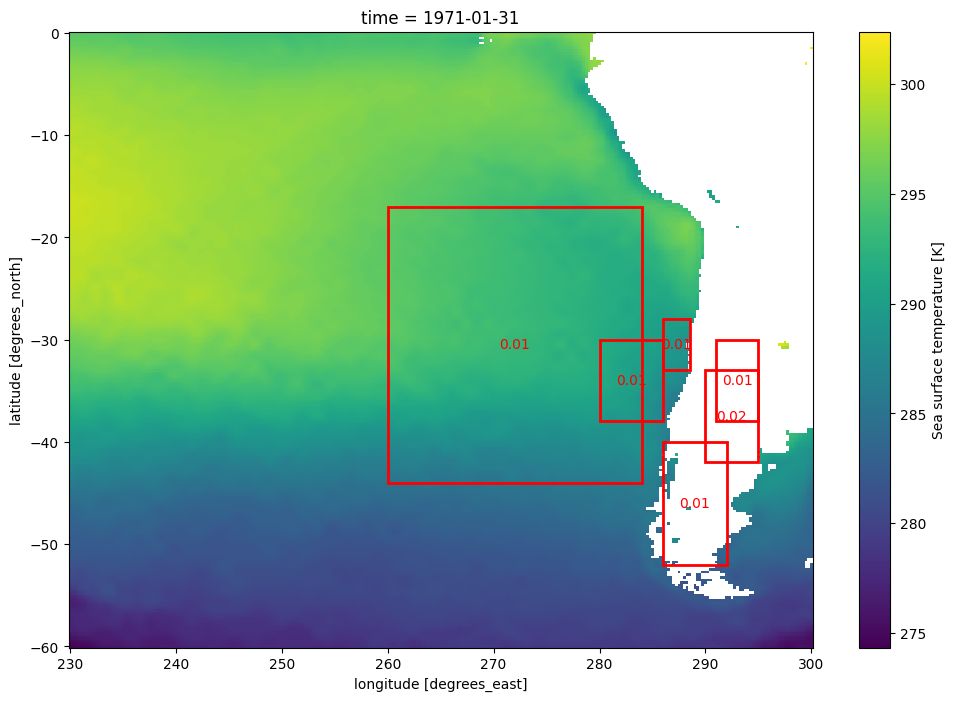

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

data_single.sel(longitude=slice(230,300), latitude=slice(-60,0)).sst.isel(time=0).plot(ax=ax)

for ratio, coords in boxes_msl:
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{np.round(ratio,2)}", 
            ha='center', va='center', color='red')

plt.show()

In [44]:
sst_freq_df = df.reset_index()
sst_freq_df = sst_freq_df[sst_freq_df["variables"]=="SST"]
sst_freq_df

,method,rolling,variables,boxes,reference_period,count_x,count_y,ratio
0,anom,1,SST,190|240|-5|5,1980-2010,268,33792,0.007931
1,anom,1,SST,270|280|-10|0,1980-2010,268,33792,0.007931
5,Anom,3,SST,190|240|-5|5,30yearsliding,183,28608,0.006397


In [42]:
boxes_sst = ((float(row["ratio"]), list(map(float, row["boxes"].split("|")))) for idx, row in sst_freq_df[:6].iterrows())

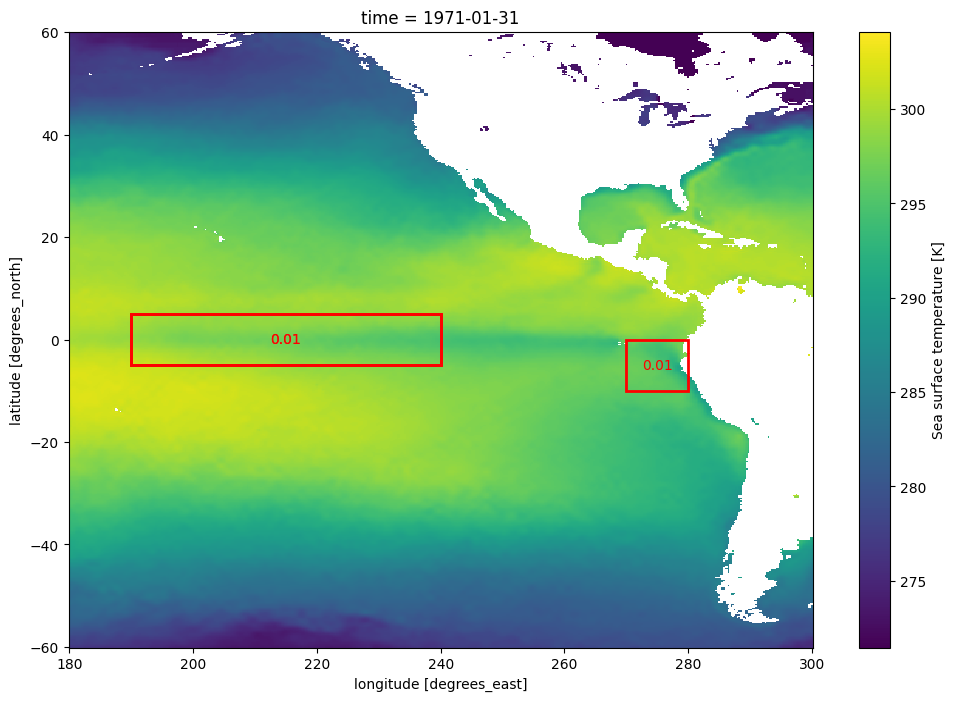

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

data_single.sst.isel(time=0).plot(ax=ax)

for ratio, coords in boxes_sst:
    lon_min, lon_max, lat_min, lat_max = coords
    width = lon_max - lon_min
    height = lat_max - lat_min
    
    # Create rectangle patch
    rect = mpatches.Rectangle((lon_min, lat_min), width, height,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
    # Optionally add a label
    ax.text(lon_min + width/2, lat_min + height/2, f"{np.round(ratio,2)}", 
            ha='center', va='center', color='red')

plt.show()